# Dimensionality reduction

### Import common libraries

In [ ]:
data_url = {
    'iof_data_1min_csv' : "https://drive.google.com/uc?id=1_jYVXj7mt8Zzpjn8WGI111G-kWRTbfjU",
    'iof_data_1min_parq' : "https://drive.google.com/uc?id=1j5SS136UzbSPu8TqG9RRUMi6-wWF9dzq",
    'mixingTank' :  "https://drive.google.com/uc?id=1b5Qn5LIa6KAE03Tq4yRVdhTyUmZLxRjt",
    'moons' : "https://drive.google.com/uc?id=1a9zTkPEpuHGj6LzGzuLe-JSLg_4GJef4",
    'open_iof_20min' : "https://drive.google.com/uc?id=15lkhdBfWnjlpgpEx4T2XcRApKr-dmBb0",
    'open_iof_cleaned' : "https://drive.google.com/uc?id=1WVbJvYsGy-iKlsW4WaDZrKy_NhK2tJLW",
    'test_data' : "https://drive.google.com/uc?id=1AUJ63mIM2we9k6H6H149YH1mSg83d3H7"
    }

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pandas display format: two decimals
pd.options.display.float_format = '{:,.2f}'.format

## Introduction to dimensionality reduction using the "moons" data

### Importing and visualising the data

We start off with a synthetic dataset to introduce the concept of PCA. Sometimes called the "moons" data set, it will also be useful in clustering later on. We load the data from `/data/moons_data.csv` then visualise it.

In [ ]:
# Read and described data
df_moons = pd.read_csv(data_url['moons'])
df_moons.describe()

We notice there are three features, `x1`, `x2`, and `x3`, which we can plot in 3D. The second plot includes a command which allows you to change the angle at which the data is viewed.

In [ ]:
# Create a figure, then plot the data in 3D
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df_moons['x1'], df_moons['x2'], df_moons['x3'], alpha = 0.5)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(df_moons['x1'], df_moons['x2'], df_moons['x3'], alpha = 0.5)
ax2.view_init(elev=5, azim=10)  # Rotate the plot

### Rotating the data in two dimensions

We can also rotate the plot using linear algebra. If $ Q $ is a matrix with orthogonal columns (i.e., $ q_i \cdot q_j = 1 $ if $ i=j $, else $ q_i \cdot q_j = 0 $), then multipyling our data matrix $ X $ by $ Q $ amounts to rotating the data. In particular,

$$ Q = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \ \end{bmatrix}  $$

will rotate two-dimensional data. We will define $ T = XQ $, so that $ T $ represents the rotated data.

Let's just consider the first two features in the moons data, then rotate it in space. You can change the amount of rotation by changing `theta` below (note that `theta` is in radians, not degrees). Also note that the `@` symbol can be used for matrix multiplication in Python (as opposed to `*`, which will result in element-wise multiplication)

In [ ]:
# Create data matrix using first two features
X = df_moons[['x1', 'x2']].values

# Create rotation matrix
theta = 0/2*np.pi
Q = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

# Rotate the data and plot
T = X @ Q
plt.scatter(T[:,0], T[:,1], alpha = 0.5)

Let us try to rotate the data so that we capture _as much variance as possible_ on the $ t_1 $-axis (that is, the first column in our rotated data matrix $ T $). To help with this, we also plot a histogram of $t_1$.

In [ ]:
X = df_moons[['x1', 'x2']].values

# Create rotation matrix
theta = 0/4*np.pi
Q = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

# Rotate the data and plot
T = X @ Q

fig,ax = plt.subplots(1,2, figsize = (10,5))
ax[0].hlines(0, -20, 20, color = 'k', alpha = 0.3)  # PLot the t1-axis
ax[0].scatter(T[:,0], T[:,1], alpha = 0.5)
ax[0].scatter(T[:,0], np.zeros_like(T[:,0]), c='k', alpha = 0.5)    # Show the values of T projected onto the t1-axis
ax[0].set_xlim(-30, 30)
ax[0].set_ylim(-30, 30)

# Draw a histogram of t1
ax[1].hist(T[:,0], bins=np.linspace(-30,30,50))
ax[1].set_xlabel('t')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of t')

### The importance of scaling

Notice that the standard deviation of $x_2$ is much larger than that of $x_1$ (run `df_moons.describe()` to confirm). Maximizing the variance in $t_1$ just amounts to rotating it so that $x_2$ is projected onto $t_1$, but this doesn't help us identify any _covariance_ or structure in our data. To address this problem, let us center and scale the data instead. 

It is recommended to center and scale data when performing dimensionality reduction. A common choice is to scale the data so that each feature has unit variance, which we can easily do this using `sklearn.preprocessing.StandardScaler`.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
# Import the StandardScaler from  scikit-learn, then define the scaled data "X"
from sklearn.preprocessing import StandardScaler
X = df_moons[['x1', 'x2']].values
X = StandardScaler().fit_transform(X)

# Rotate the scaled data and plot
theta = 0/4*np.pi
Q = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
T = X @ Q

fig,ax = plt.subplots(1,2, figsize = (10,5))
ax[0].hlines(0, -20, 20, color = 'k', alpha = 0.3)
ax[0].scatter(T[:,0], T[:,1], alpha = 0.5)
ax[0].scatter(T[:,0], np.zeros_like(T[:,0]), c='k', alpha = 0.5)
ax[0].axis('equal')
ax[0].set_xlim(-2.5, 2.5)
ax[0].set_ylim(-2.5, 2.5)

ax[1].hist(T[:,0], bins=np.linspace(-2.5,2.5,40))
ax[1].set_xlabel('t')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of t')

### Rotating data in 3D

Let us now consider the three-dimensional data set. We can rotate data in 3D using the $ 3 × 3 $ orthogonal matrix $ Q $ defined by:

$$ 
Q = \begin{bmatrix} \cos(\theta) & -\sin(\theta) & 0 \\ \sin(\theta) & \cos(\theta) & 0 \\ 0 & 0 & 1 \ \end{bmatrix}
       \begin{bmatrix} 1 & 0 & 0 \\ 0 & \cos(\phi) & -\sin(\phi) \\ 0 & \sin(\phi) & \cos(\phi) \ \end{bmatrix}  
$$

Here, $ \theta$ specifies the rotation around the $z$-axis and $\phi$ defines the rotation around the $x$-axis. We can rotate the data in 3D, then project the data down onto the $(t_1,t_2)$ plane. Again, we are trying to capture as much variance in the data as we can, i.e., maximize the variance of $t_1$ and $t_2$.

In [ ]:
# Define a new data matrix which includes all three components of the original data, and scale
X = df_moons[['x1', 'x2', 'x3']].values
X = StandardScaler().fit_transform(X)

# Define the rotation matrix, then rotate the scaled data
theta = 0/4*np.pi
phi = 0/4*np.pi
Q = ( np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0],[0, 0, 1]])
     @np.array([[1, 0, 0], [0, np.cos(phi), -np.sin(phi)], [0, np.sin(phi), np.cos(phi)]]) )
T = X @ Q

# Create a 3D scatter plot of the rotated data, showing the projection onto the t1-t2 plane
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(T[:,0], T[:,1], T[:,2], alpha = 0.5)
ax1.scatter(T[:,0], T[:,1], 0*T[:,2] - 4, s = 2, c = 'k')
ax1.axis('equal')

# Use seaborn to show a joint plot of the projected data
sns.jointplot(x=T[:,0], y=T[:,1])

### Principal Component Analysis (PCA)

Is it possible to calculate the rotation matrix $ Q $ that will result in the maximum variance? **Yes**, this is exactly what Principal Component Analysis (PCA) does. We will use the `sklearn.decomposition.PCA` to create a PCA object, fit it to our standardized data, then extract the rotation matrix $ Q $ that will result in the maximimum variance in our projected data.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
from sklearn.decomposition import PCA

# We create our standardized data matrix by applying the StandardScaler directly to the dataframe.
# Note that StandardScaler returns a numpy array, not a dataframe
X = StandardScaler().fit_transform(df_moons)

# We create a PCA object and fit it to our standardized data
pca = PCA()
pca.fit(X)

# The rotation matrix "Q" is the transpose of the "principal components" learnt using PCA. 
# We can access it using the "components_" attribute of the PCA object after fitting to the data.
Q = pca.components_.T   # Transpose to get the rotation matrix
T = X @ Q

# Create a 3D scatter plot of the rotated data, showing the projection onto the t1-t2 plane
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(T[:,0], T[:,1], T[:,2], alpha = 0.5)
ax1.scatter(T[:,0], T[:,1], 0*T[:,2] - 4, s = 2, c = 'k')
ax1.axis('equal')

sns.jointplot(x=T[:,0], y=T[:,1])

In the code above, we used `pca.fit(X)` to learn the rotation matrix which will maximize the variance in our projected data. However, we usually don't need to extract the matrix $ Q $ separately, we can simply use `T = pca.transform(X)`, which automatically applies the learnt transformation. Note that you have to `fit` the PCA model before you can use `transform`.

In literature, the columns of $ Q $ are often called the loadings, and the transformed data $ T $ are called the scores.

In [ ]:
X = StandardScaler().fit_transform(df_moons)
pca = PCA() # Create a PCA object
pca.fit(X)  # Fit it to the data
T = pca.transform(X)    # Transform the data to obtain the scores
sns.jointplot(x=T[:,0], y=T[:,1])   #  Plot the first two components

Instead of fitting and transforming the data separately, we can use the `fit_transform` method to fit the data and calculate the scores directly.

In [ ]:
X = StandardScaler().fit_transform(df_moons)
pca = PCA() # Create a PCA object
T = pca.fit_transform(X)    # Transform the data to obtain the scores
sns.jointplot(x=T[:,0], y=T[:,1])   #  Plot the first two components

### Reduced dimensions and variance explained by each principal component

Let us inspect the *shape* of the matrices $ Q $ and $ T $

In [ ]:
print(Q.shape)
print(T.shape)

As you can see, the $ Q $ matrix is a $ 3 × 3 $ matrix, whereas the scores matrix is $ 500 × 3 $. In other words, the scores matrix contains 500 observations and 3 feature - as many as the original data set. So did PCA perform dimensionality reduction?

The effect of PCA is to produce a scores matrix $ T = XQ $ such that the first feature in our transformed data $t_1$ has the greatest variance, $t_2$ has the second greated variance, etc. By plotting the two-dimensional data $ (t_1, t_2) $, we are plotting the projection with the greatest variance.

We can visualise the amount of variance in each principal component (i.e., the amount of variance in the scores $t_1$, $t_2$, etc.) using the `explained_variance_ratio_` method in the PCA object. The `explained_variance_ratio_` gives the *fraction* of variance explained by each component, i.e., $$ \frac{\sigma^2_{component}}{\sigma^2_{total}} $$ 

Let us plot the fraction of variance explained by each component, as well as the cumulative variance explained.

In [ ]:
index=range(1,pca.n_components_+1)  # Used for the x-axis
plt.bar(index, pca.explained_variance_ratio_, label='Individual components')

# Calculate the cumulative explained variance
cumulativeFractionVarianceExplained = np.cumsum(pca.explained_variance_ratio_)
plt.plot(index, cumulativeFractionVarianceExplained, 'o-', label='Cumulative variance explained')

# Additional plot formatting
plt.hlines(0.9, 0, pca.n_components_, color='k', ls='--', label='90 percent of total variance')
plt.xlabel('Number of components')
plt.ylabel('Explained variance fraction')
plt.grid(True)  # Add grid
plt.legend()

print(pca.explained_variance_ratio_)

For the moons data, almost all the variance lies in the first principal component. This is not obvious from the seaborn jointplot, since the jointplot does not scale the axes to be equal. We can see that the 3rd principal component contains less than 1% of the variance.

In practice, we can create a scores matrix $ T $ with reduced dimensions by only keeping the first few columns in $ Q $. Let's define $ Q_r $ as the first $ d $ columns in $ Q $, where $d$ is the number of dimensions we'd like to retain. In our case, we want to retain two dimensions (useful for visualisation). Then we simply have:

$$ T = XQ_r $$

In [ ]:
X = StandardScaler().fit_transform(df_moons)
pca = PCA()
pca.fit(X)
Q = pca.components_.T[:,:2]   # We retain all the rows, but only the first two columns
print(Q.shape)

T = X @ Q
print(T.shape)

sns.jointplot(x=T[:,0], y=T[:,1])

In practice, we can set the number of components to retain by using the `n_components` keyword argument when creating the PCA object, then applying `fit_transform` as usual.

In [ ]:
X = StandardScaler().fit_transform(df_moons)
pca = PCA(n_components=2) # Create a PCA object that will only retain the first two principal components
T = pca.fit_transform(X)    # Transform the data to obtain the scores
sns.jointplot(x=T[:,0], y=T[:,1])   #  Plot the first two components

### Reconstructing the original data

We can also try to reconstruct the original data matrix using the scores. If we retained all components, then $Q$ will be a $3 × 3$ matrix, hence invertible:
$$ T = XQ $$
$$ \therefore X = TQ^{-1} $$

But orthogonal matrices (such as $Q$) have the special property that $Q^{-1} = Q^T$, i.e., the inverse is equal to the transpose:

$$ X = TQ^T $$

If we only have the first few principal components (i.e., we used $ T = XQ_r $ where $Q_r$ is only the first few rows in the rotation matrix), then we can estimate the original matrix in the same way:

$$ X ≈ X_r = TQ_r^T $$

In [ ]:
X = StandardScaler().fit_transform(df_moons)
pca = PCA(n_components=2) # Create a PCA object that will only retain the first two principal components
T = pca.fit_transform(X)    # Transform the data to obtain the scores
Qr = pca.components_.T[:,:2] # Retain the first two rows of Q
Xr = T @ Qr.T  # Reconstruct the original data
MSE = ((X - Xr)**2).mean()  # Calculate the mean squared error

print(f"The mean squared error between the original and reconstructed data is {MSE:.2e}")
print(f"The variance not explained by the first two principal components is {1 - pca.explained_variance_ratio_.sum():.2e}")

The mean squared error (MSE) between the original and reconstructed data is the same as the variance *not explained* by the retained principal components, which we know is a minimum per definition of PCA. The reconstruction error is a metric often used in fault detection.

## PCA using the iron ore flotation data

### Load the dataset

Let's use PCA to visualise the iron ore flotation data. Start by loading the cleaned dataset with renamed columns. We will also resample to 4-hourly data to reduce the size of the dataset.

In [ ]:
df_concentrator = pd.read_csv(data_url['open_iof_cleaned'], index_col='date', parse_dates=['date'])
df_concentrator = df_concentrator.resample('4h').median()

df_concentrator.dropna(inplace=True)
df_concentrator.describe().T

### Perform PCA and view the fraction variance explained

In this example, we will look at a subset of the data that excludes the outputs of interest (i.e., iron and silica composition). We will try to see if the easily measurable data form "clusters" that we can visualise to identify regions of high and low compositions.

We will perform PCA but retain all components so we can visualise the fraction of variance explained.

In [ ]:
df_pca = df_concentrator.drop(['y product iron %', 'y product silica %'], axis = 1)


# 🎯 Practice Point
Use StandardScaler to standardize the data, then use PCA to learn the scores `T`

The code below will plot the fraction of variance explained by each component. 

In [ ]:
# Learn components: Explained variance plot
index=range(1,pca.n_components_+1)
plt.bar(index, pca.explained_variance_ratio_, label='Individual components')
plt.plot(index, np.cumsum(pca.explained_variance_ratio_), 'o-', label='Cumulative variance explained')
plt.hlines(0.9, 0, pca.n_components_, color='k', ls='--', label='90 percent of total variance')
plt.xlabel('Number of components')
plt.ylabel('Explained variance fraction')
plt.grid(True)  # Add grid
plt.legend()

We need to retain at least ten components to explain 90% of the variance. We will keep this in mind.

### Visualising the first few principal components

# 🎯 Practice Point
Let us start with visualisation in two dimensions. Create a scatter plot of the first two components, contained in the first two columns of the scores matrix `T`

We can already see some clusters in the data. We can provide more information by colouring the data according to values in our data frame. Let's colour the data according to the timestamp. We can do so by setting the colour of the data points in our `scatter` plot using the `c` keyword argument. We also set the colormap to `viridis`.

# 🎯 Practice Point
Create a scatter plot of the first two components, contained in the first two columns of the scores matrix "T"
Use the color argument to show the month of the year, by setting `c=df_concentrator.index.month`

In [ ]:



# After createing the scatter plot, the code below adds a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Month')
plt.show()

The behaviour early on (months 4 and 5) in the dataset is quite different from the later months. Let's see how the other variables change with respect to the location in the reduced space. First, we define a function that will plot the first two principal components coloured according to time, then again coloured according to each feature in our data set. Here, we will use the full data set (including the product compositions) to colour the data.

Since we will use this approach again later on, we define a function that accepts as inputs the scores to plot, as well as the dataframe containing the data used to colour the markers.

In [ ]:
# Define a function that accepts scores (more generally, latent variables) "L" and dataframe "df" as inputs, with optional input "alpha"
def plotAndColorLatentVariables(L, df, alpha = 0.5): 
    I = np.ceil(np.sqrt(df.shape[1])).astype(int)   # Determine the number of rows in the subplot grid
    J = np.ceil(df.shape[1]/I).astype(int)          # Determine the number of columns in the subplot grid
    fig, ax = plt.subplots(I,J, figsize = (20,20))  # Create the subplot grid
    
    for i in range(I):                       # Loop over the rows
        for j in range(J):                   # Loop over the columns
            k = I*i+j-1                      # Compute the index of the subplot
            if k == -1:     # Colour the plot according to the dataframe index
                ax[i,j].scatter(L[:, 0], L[:, 1], alpha = alpha, c=df.index, cmap='viridis')
                ax[i,j].set_title('Index')
                
            elif k <= (df.shape[1]-1):  # Colour the plot according to the dataframe columns
                ax[i,j].scatter(L[:, 0], L[:, 1], alpha = alpha, c=df.iloc[:,k], cmap='viridis')
                ax[i,j].set_title(df.columns[k])

We can now call the function `plotAndColorLatentVariables` to plot the PCA scores and colour by the columns in our original dataframe.

In [ ]:
plotAndColorLatentVariables(T, df_concentrator)

From the visualisation, we can see that the clusters are mostly related to the airflowrates. Many of the outliers are associated with low amine or starch flowrates. We can also see the forth depth having a major influence on the variability in the data, with froth depth typically increasing as $t_1$ and $t_2$ increase from the bottom left of the plot to the top right.

Unfortunately, the relationship between the scores of the input data and the product composition is not clear.

### Biplots

A biplot is another common way to interpret scores plot. The biplot projects the original coordinate system (i.e., the original variables) into the reduced dimensional space, which fortuitously corresponds to the columns of our loadings matrix $Q$. This gives an indication of the relative contribution of each variable to the principal component scores.

See the projection of the 3D moons data, along with the projection of the coordinate axes, to understand the concept.
If the image below does not display, follow [this link](https://drive.google.com/file/d/1VibxPkVR8bm7ukBvsdTQ9NOWPFooBw07/view?usp=drive_link) to view it.

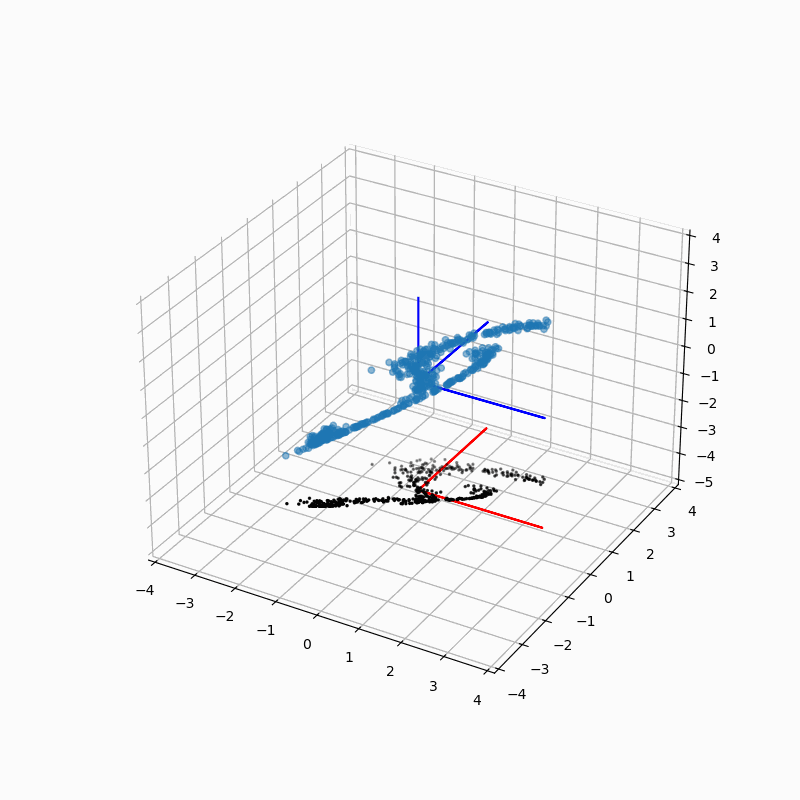

In [22]:
from IPython.display import display, Image
display(Image('PCA-rotation-3D.gif'))

In the code below, we select five variables (`x C01.air.flow Nm3/h`, `x C01.froth.depth mm`, `u starch m3/h`, `u amina m3/h`, `d feed m3/h`) to include in the biplot. We could plot them all, but that would make the plot far too confusing. 

To plot the loading vectors (i.e., the columns of $Q$ corresponding to the features of interest), we plot an arrow from the origin to the vector, and label it with the name of the corresponding feature.

In [ ]:
fig,ax = plt.subplots(figsize = (5,5))
ax.scatter(T[:, 0], T[:, 1], c=df_concentrator.index.month, cmap='viridis') # Plot the scores, coloured by month
Q = pca.components_.T   # Get the loadings

selected_variables = ['x C01.air.flow Nm3/h', 
                      'x C01.froth.depth mm', 
                      'u starch m3/h',
                      'u amina m3/h',
                      'd feed m3/h']

scaling_factor = 15     # The scaling factor adjusts the relative length of the arrows. Adjust as needed
for variable in selected_variables:     # Loop over the selected variables
        i = np.where(df_pca.columns == variable)[0]     # Find the index of the variable in the dataframe
        ax.annotate(variable,                           # Create the arrow using the annotate  method
                xy=(0,0),       # Arrow start position
                xytext=(scaling_factor*Q[i,0], scaling_factor*Q[i,1]), # Arrow end position
                arrowprops=dict(color='red',arrowstyle='<-',relpos=(0,0)) # Additional arrow properties
                )

ax.set_title('T1 vs T2 colored by plant.flotation.bank01.column03.air.flow')
ax.axis('equal')

As alluded to earlier, the airflow and froth depth have a major impact on the data, as shown by the large arrows. The biplot is a very useful way to summarize the contributions of multiple features in a single plot.

### Plotting in three dimensions

Nothing prevents you from plotting the first three principal components in the same way. This may also be a useful way to identify patterns.

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(T[:,0], T[:,1], T[:,2], c=df_concentrator.index.month, cmap='viridis')
ax.set_xlabel('T1')
ax.set_ylabel('T2')
ax.set_zlabel('T3')
ax.set_title('3D Scatter Plot of T1, T2, and T3')

plt.show()

## Beyond linear dimensionality reduction

Thus far, we have asked "what is the matrix $Q$ such that the variance in $T = XQ$ is maximized in $t_1$, then $t_2$, etc. ?". 

Stated differently, we could ask "Find the reduced feature matrix $Q_r$ such that the reconstruction error $ ∑ (X - X_r)^2 $ is minimized, with the reconstructed data $X_r = TQ_r^T $ and $ T = XQ_r$". 

However, there are two important points to note.

First, we could ask a different question, e.g., "what is the reduced feature matrix $ T = XQ_r $ that serves as the best linear predictor for an output $y$?" 

In other words, "Find the orthogonal matrix $Q_r$ which minimizes $∑ (y - y_{predicted})^2 $ where $y_{predicted} = T\beta$ and $T = XQ_r$, with $\beta$ a vector of linear regression coefficients."

This is the question that *partial least squares* (PLS) seeks to answer. Similar techniques include *canonical correlation analysis* (CCA), and *independent component analysis* (ICA), and many more. 

Second, in all the above we were looking for a matrix $Q$ which optimizes some objective function. This constrains the possible transformations to *linear transformations* of the data. There are many other non-linear dimensionality reduction techniques available, although the hyperparameters for these methods are often difficult to tune. Common methods include:
* Kernel methods (e.g., kPCA) which first transforms the data to a non-linear feature space.
* Manifold learning (e.g., LLE, t-SNE), which aims to learn a lower dimensional, non-linear manifold containing the data
* Neural networks (e.g., autoencoders), which include "bottle neck" layers with a small number of features in the network architecture

We will consider one method, t-SNE, below. See the scikit-learn [decomposition tutorial](https://scikit-learn.org/stable/modules/decomposition.html#) or [manifold learning tutorial](https://scikit-learn.org/stable/modules/manifold.html) pages for more details regarding the methods available in the scikit-learn library. [Keras](https://keras.io/) is an excellent tool for building autoencoders; you can read more on the [Keras blog](https://blog.keras.io/building-autoencoders-in-keras.html)

### Using non-linear methods to visualise more than three principal component scores

Recall that we needed to retain the first ten principal components to achieve 90% cumulative variance explained. However, it is difficult to visualise the first 10 principal components. We can use a manifold learning technique, *t-SNE* ([t-distributed Stochastic Neighbourhood Embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)) to reduce the 10 principal components to a two-dimensional space for visualisation.

Why not simply perform t-SNE on the original data? This is an option, but the non-linear method requires more computational power, and can become prohibitively slow in a high dimensional feature space. The method may also suffer from the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

In [ ]:
from sklearn.manifold import TSNE

# Repeat PCA to avoid potential errors
pca = PCA()
tsne = TSNE()

X = StandardScaler().fit_transform(df_pca)
T = pca.fit_transform(X)
L = tsne.fit_transform(T[:,:10])
plotAndColorLatentVariables(L, df_concentrator)

It seems there are more distinct clusters in the 10-dimensional principal component space which we are not able to clearly visualise when we simply project the data linearly to the first two principal components. However, t-SNE enables us to plot the 10D space in 2D, keeping points that are "close" together in the original space, close together in the two-dimensional space. For example, notice the *high air flow*, *low feed rate* cluster, as well as the *moderate air flow*, *low froth depth* cluster. 

Experiment by providing a different number of principal components to t-SNE using `L = tsne.fit_transform(T[:,:n])` where `n` is the number of components retained, observing both the change in the visualisation and the speed of the computation.

# 🎯 Practice Point
In the following:
1. Import TSNE from sklearn.manifold and PCA from sklearn.decomposition
2. Create a PCA and a TSNE object. Specify the number of components to be retained in PCA as a smaller number (e.g., 10)
3. Standardize the data contained in "df_pca" using StandardScaler to create a data matrix "X"
4. Fit the PCA object to the data matrix "X" and obtain the scores "T"
5. Perform TSNE on the scores "T" to obtain the latent variables "L"
6. Create a scatter plot of the latent variables "L" using the scatter method, and color the points according to the month of the year

# Uniform Manifold Approximation and Projection (UMAP)
UMAP is a recently developed non-linear dimensionality reduction technique that bears some similarities to t-SNE. It is faster than t-SNE, and likely more suited to subsequent clustering. Full details can be found in the [UMAP documentation](https://umap-learn.readthedocs.io/en/latest/).

In the following, we will apply UMAP to the iron ore flotation data, using the first ten principal components as input. We will also use the `n_neighbors` and `min_dist` hyperparameters to control the size of the neighbourhood and the minimum distance between points in the reduced space. Varying these hyperparameters will change the dimensionality reduction results. UMAP also relies on a random seed, which means results may not always be exactly reproducible. You can set the random seed using the `random_state` keyword argument.

In [ ]:
from umap import UMAP
umap = UMAP(n_neighbors=10, min_dist=0.1, random_state=42)
L = umap.fit_transform(T[:,:10])
plotAndColorLatentVariables(L, df_concentrator)